## Visualizing intermediate activations

visualize 

In [15]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [1]:
from keras.models import load_model

In [2]:
model = load_model('cats_and_dogs_small_2.h5')

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [21]:
img_path = 'D:/Datasets/cats_and_dogs_small/test/cats/1577.jpg'

In [22]:
from keras.preprocessing import image
import numpy as np

In [23]:
img = image.load_img(img_path, target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor.shape

(150, 150, 3)

In [24]:
img_tensor = np.expand_dims(img_tensor, axis=0)
print(img_tensor.shape)
img_tensor = img_tensor / 255.

(1, 150, 150, 3)


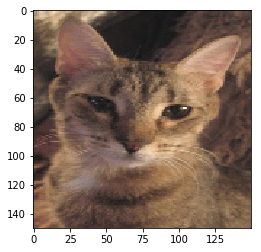

In [25]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [33]:
from keras import Model

In [34]:
layer_output = [layer.output for layer in model.layers[:8]]

In [36]:
activation_model = Model(inputs=model.input, outputs=layer_output)

In [37]:
activations = activation_model.predict(img_tensor)

In [54]:
activations[0].shape

activations[0].shape[-1]

32

In [38]:
first_layer_activation = activations[0]

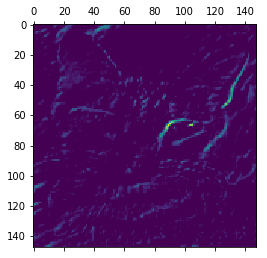

In [46]:
plt.matshow(first_layer_activation[0,:,:,14])

In [49]:
layer_names = []

for layer in model.layers[:8]:
    layer_names.append(layer.name)

In [50]:
layer_names

['conv2d_1',
 'max_pooling2d_1',
 'conv2d_2',
 'max_pooling2d_2',
 'conv2d_3',
 'max_pooling2d_3',
 'conv2d_4',
 'max_pooling2d_4']

In [51]:
images_per_row = 16

c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


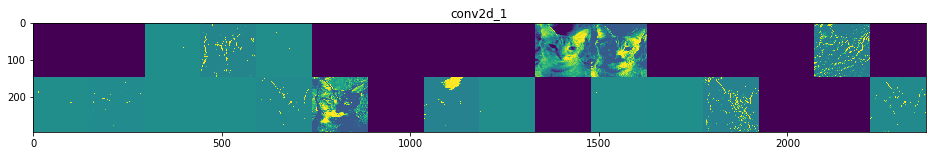

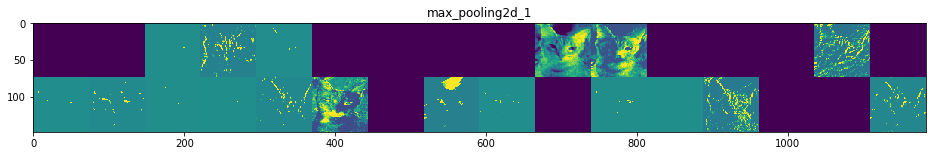

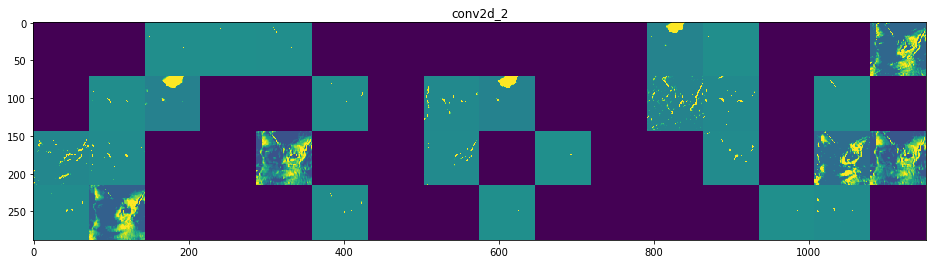

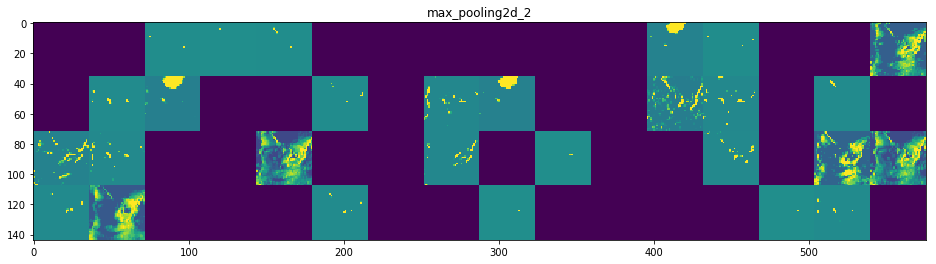

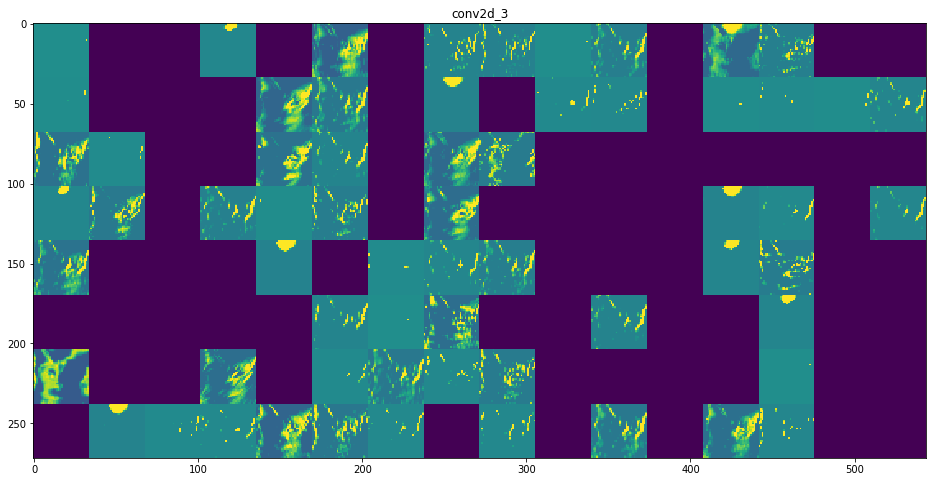

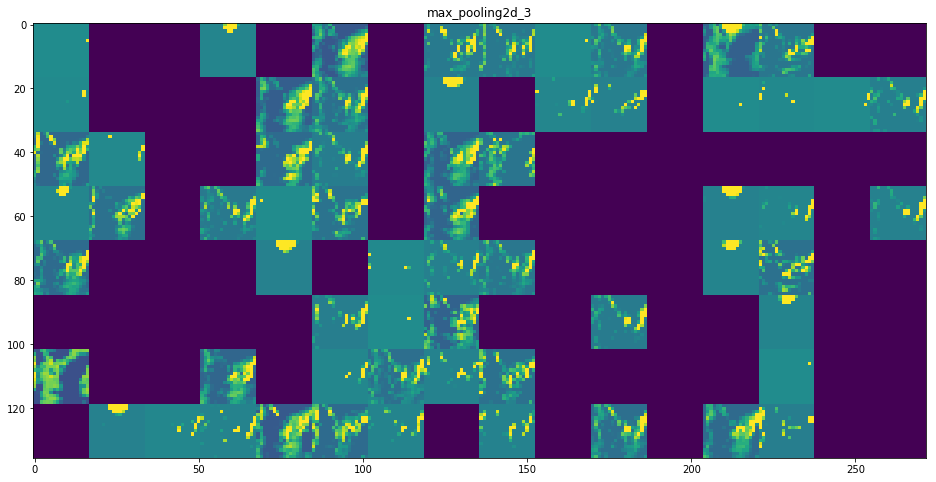

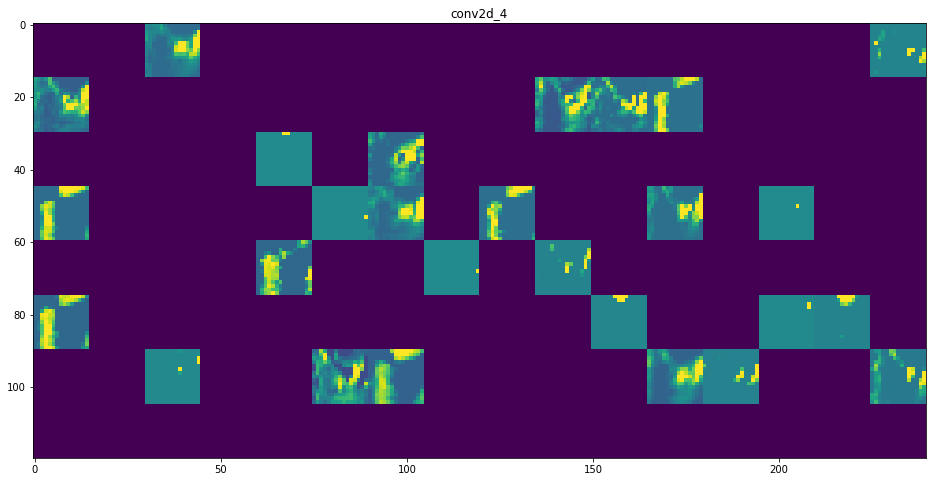

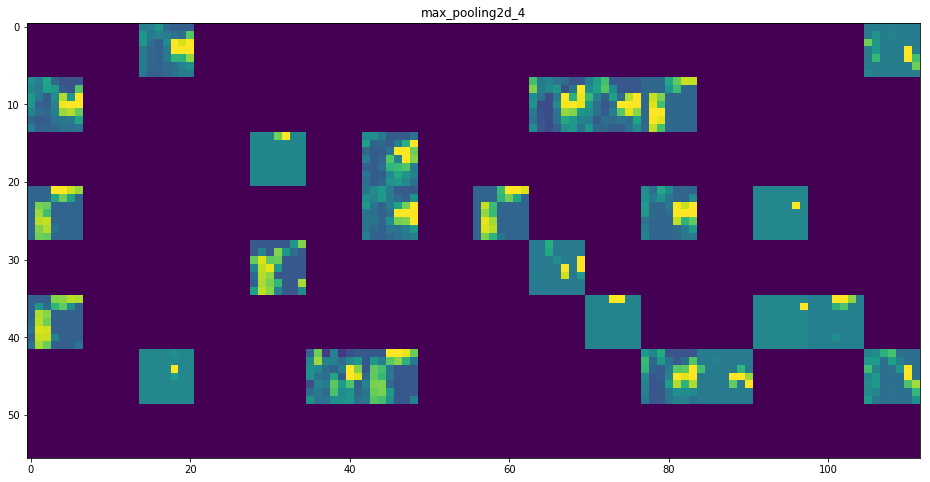

In [60]:
for layer_name, layer_activation in zip(layer_names, activations):
    no_of_feature_maps = layer_activation.shape[-1]
    
    size = layer_activation.shape[1]
    
    n_rows = no_of_feature_maps // images_per_row
    
    display_grid = np.zeros((size * n_rows, images_per_row * size))
    
    for row in range(n_rows):
        for col in range(images_per_row):
            channel_image = layer_activation[0,:,:,row*images_per_row+col]
            
            #normalize the image
            channel_image = channel_image - channel_image.mean()
            channel_image = channel_image / channel_image.std()
            
            channel_image *= 64
            channel_image += 128
            
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[row * size : (row + 1) * size, col * size : (col + 1) * size] = channel_image
            
            
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
    scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
        
        

In [92]:
img_path = 'D:/Datasets/cats_and_dogs_small/test/cats/1577.jpg'

In [93]:
from keras.preprocessing import image
import numpy as np

In [94]:
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

In [95]:
img_tensor.shape

(1, 150, 150, 3)

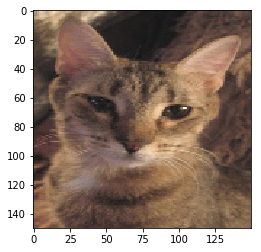

In [96]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [97]:
model.layers

In [98]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]

In [99]:
layer_outputs[0].shape

TensorShape([Dimension(None), Dimension(148), Dimension(148), Dimension(32)])

In [100]:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [101]:
activations = activation_model.predict(img_tensor)

In [102]:
activations[0].shape

(1, 148, 148, 32)

In [103]:
import matplotlib.pyplot as plt

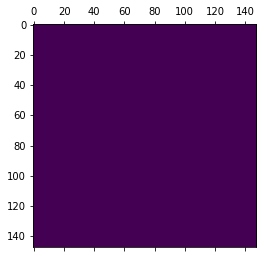

In [104]:
plt.matshow(activations[0][0,:,:,4], cmap='viridis')

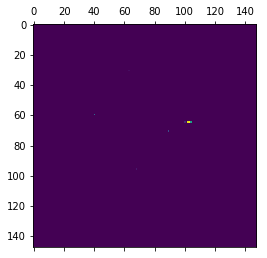

In [105]:
plt.matshow(activations[0][0,:,:,7], cmap='viridis')

In [86]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
    
    size = layer_activation.shape[1]
    
    n_cols = n_features // images_per_row
    
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,col * images_per_row + row]
            
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
            
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

NameError: name 'layer_activation' is not defined

In [85]:
layer_names

['conv2d_1',
 'max_pooling2d_1',
 'conv2d_2',
 'max_pooling2d_2',
 'conv2d_3',
 'max_pooling2d_3',
 'conv2d_4',
 'max_pooling2d_4']

c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


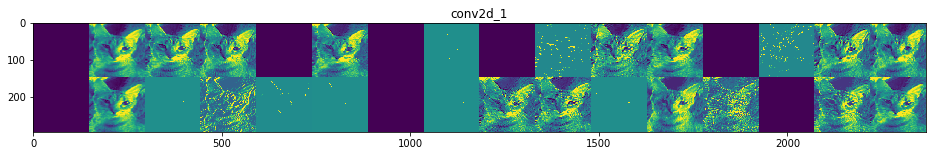

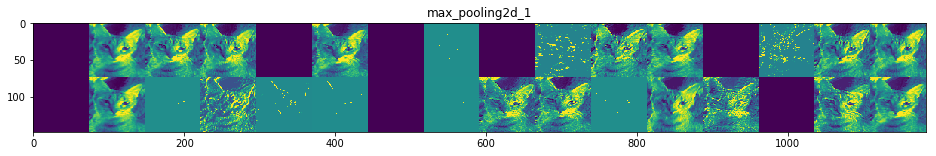

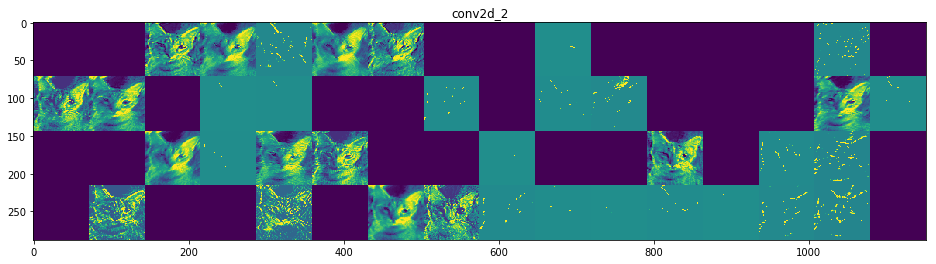

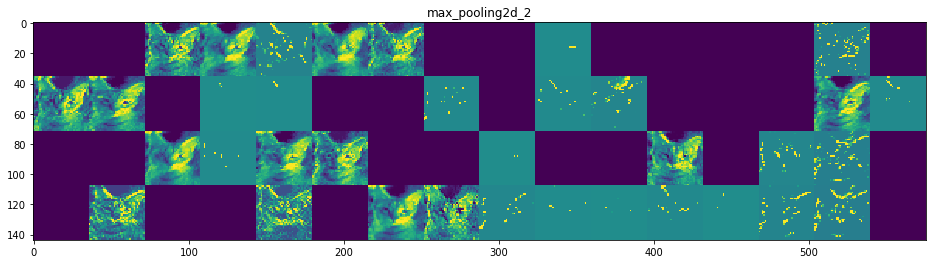

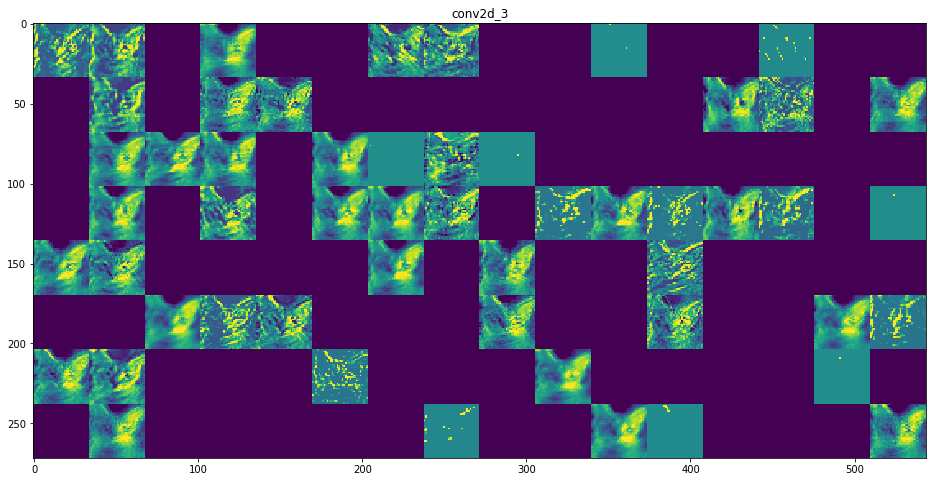

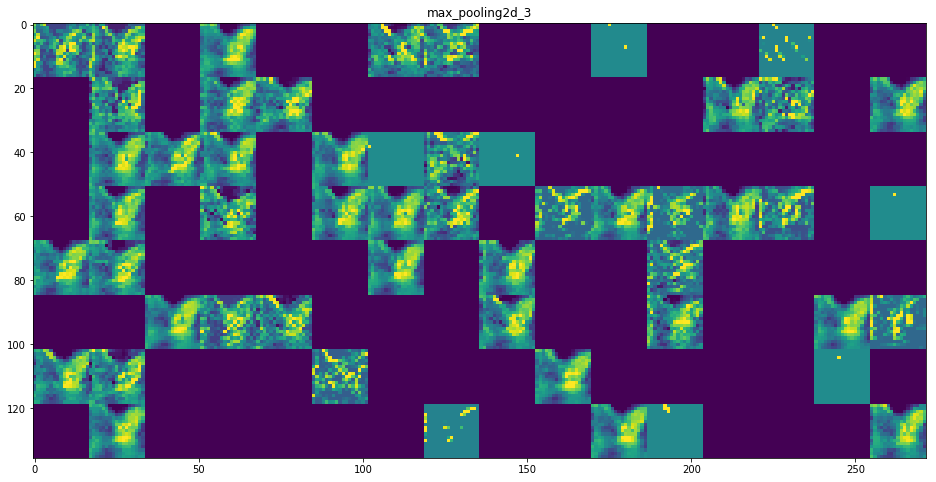

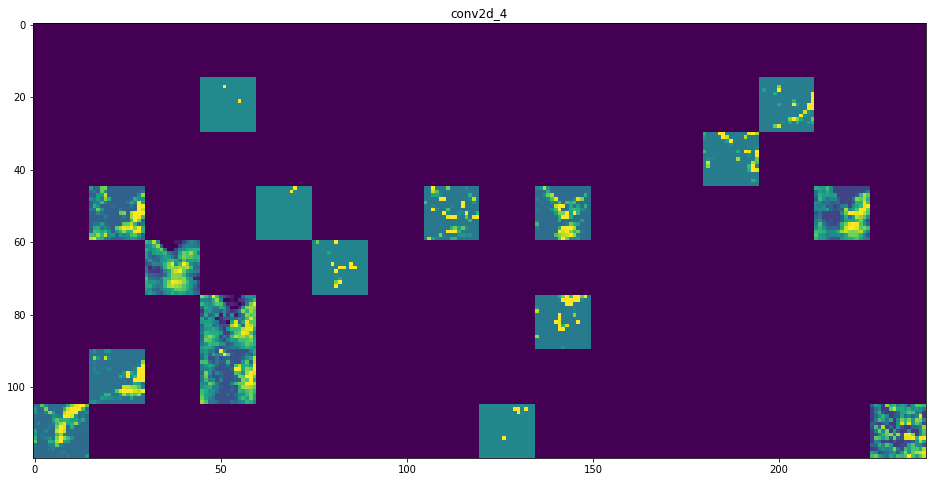

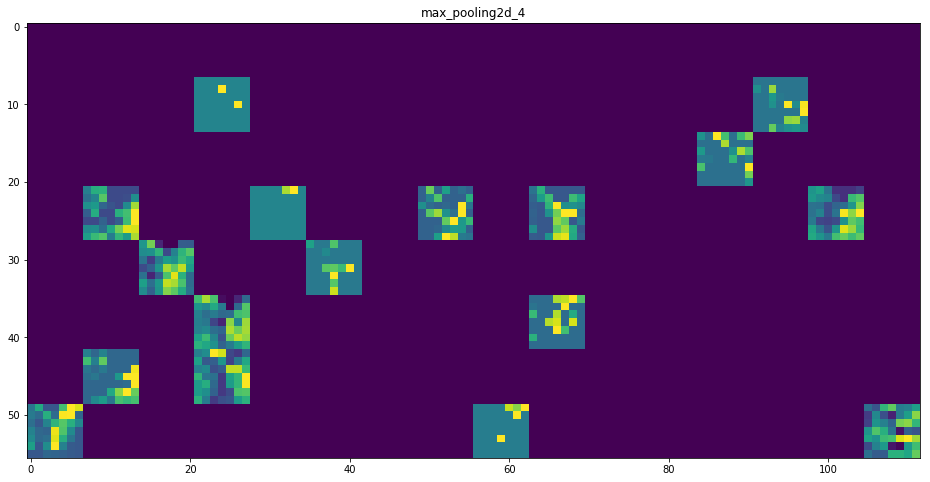

In [106]:
import keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()